## Load data

In [1]:
!pwd

/notebooks


In [2]:
!git clone https://github.com/sunh0003/W251_FinalProject.git

fatal: destination path 'W251_FinalProject' already exists and is not an empty directory.


In [3]:
%mkdir data

mkdir: cannot create directory ‘data’: File exists


In [4]:
%cd W251_FinalProject

/notebooks/W251_FinalProject


In [5]:
%cd Kaggle

/notebooks/W251_FinalProject/Kaggle


In [6]:
%mkdir /notebooks/data/train

mkdir: cannot create directory ‘/notebooks/data/train’: File exists


In [7]:
from shutil import unpack_archive
unpack_archive('train1.zip', '/notebooks')
unpack_archive('train2.zip', '/notebooks')
unpack_archive('train3.zip', '/notebooks')
unpack_archive('validation.zip', '/notebooks')

In [8]:
%mv /notebooks/train1/fear /notebooks/data/train
%mv /notebooks/train1/happy /notebooks/data/train
%mv /notebooks/train2/netural /notebooks/data/train
%mv /notebooks/train2/sad /notebooks/data/train
%mv /notebooks/train2/suprise /notebooks/data/train
%mv /notebooks/train3/angry /notebooks/data/train
%mv /notebooks/train3/disgust /notebooks/data/train
%mv /notebooks/validation /notebooks/data

mv: cannot move '/notebooks/train1/fear' to '/notebooks/data/train/fear': Directory not empty
mv: cannot move '/notebooks/train1/happy' to '/notebooks/data/train/happy': Directory not empty
mv: cannot stat '/notebooks/train2/netural': No such file or directory
mv: cannot move '/notebooks/train2/sad' to '/notebooks/data/train/sad': Directory not empty
mv: cannot stat '/notebooks/train2/suprise': No such file or directory
mv: cannot move '/notebooks/train3/angry' to '/notebooks/data/train/angry': Directory not empty
mv: cannot move '/notebooks/train3/disgust' to '/notebooks/data/train/disgust': Directory not empty
mv: cannot move '/notebooks/validation' to '/notebooks/data/validation': Directory not empty


In [9]:
!pwd

/notebooks/W251_FinalProject/Kaggle


## Model

In [10]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.5/dist-packages (20.1.1)


In [11]:
!pip3 install pillow

In [69]:
! rmdir /notebooks/data/validation/.ipynb_checkpoints

rmdir: failed to remove '/notebooks/data/validation/.ipynb_checkpoints': No such file or directory


### Re-run from here!

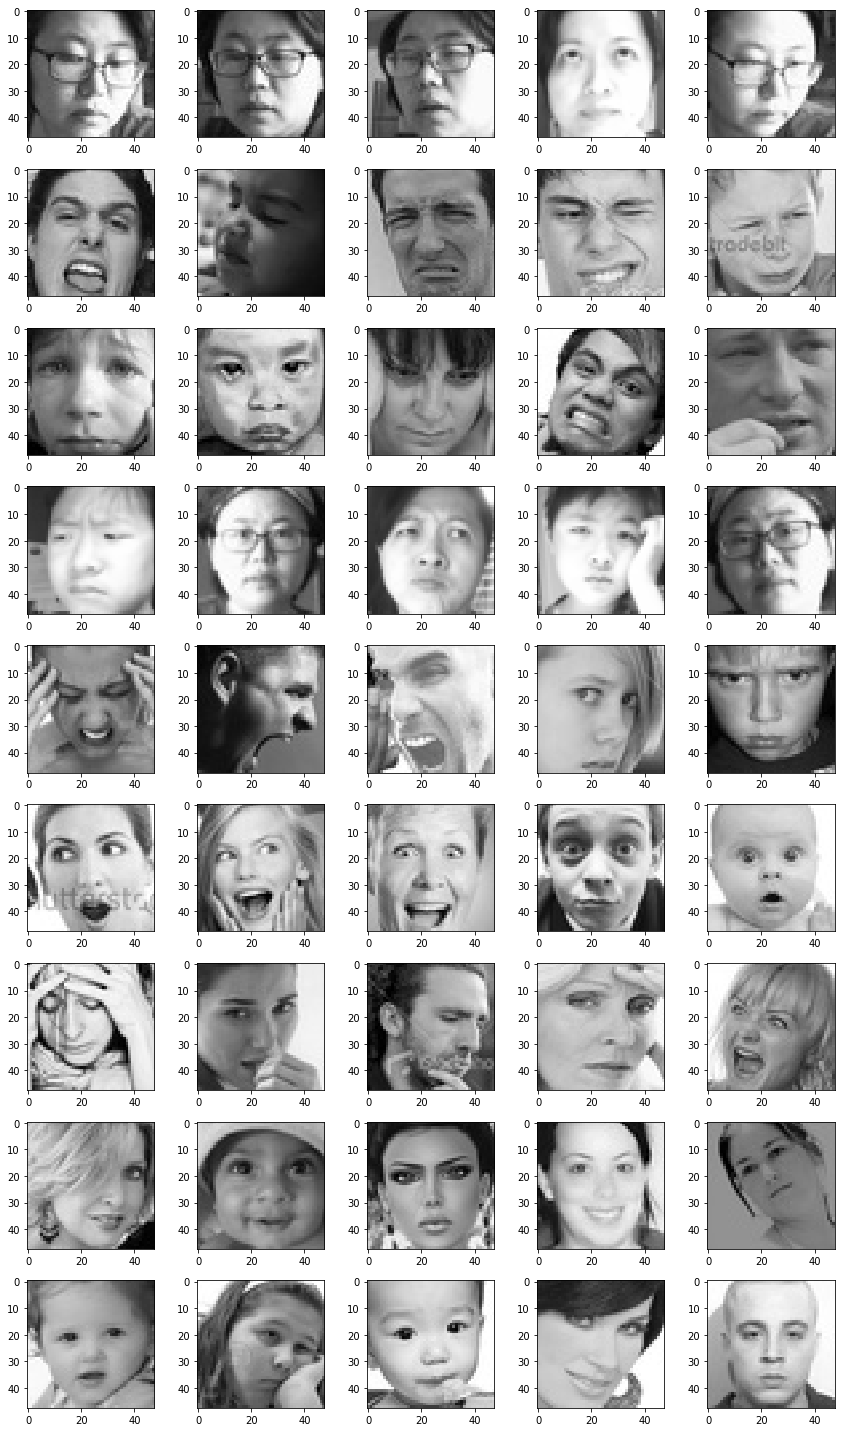

In [201]:
# display some images for every different expression

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os


# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/notebooks/data/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(9,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [203]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")


645 distracted images
436 disgust images
4938 sad images
649 confused images
3993 angry images
3205 surprise images
4103 fear images
7164 happy images
4982 neutral images


In [204]:
# count number of validation images for each expression

for expression in os.listdir(base_path + "validation"):
    print(str(len(os.listdir(base_path + "validation/" + expression))) + " " + expression + " images")

175 distracted images
111 disgust images
1139 sad images
163 confused images
960 angry images
797 surprise images
1018 fear images
1825 happy images
1216 neutral images


In [205]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 30114 images belonging to 9 classes.
Found 7402 images belonging to 9 classes.


In [159]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 9

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [206]:
steps_per_epoch=train_generator.n//train_generator.batch_size

In [207]:
validation_steps = validation_generator.n/validation_generator.batch_size
validation_steps

57.828125

In [208]:
%%time

# number of epochs to train the NN
epochs = 20

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/20
235/235 [==============================] - 1008s 4s/step - loss: 1.0755 - acc: 0.5919 - val_loss: 1.0929 - val_acc: 0.5995

Epoch 00001: val_acc improved from -inf to 0.59951, saving model to model_weights.h5
Epoch 2/20
235/235 [==============================] - 1006s 4s/step - loss: 1.0487 - acc: 0.6026 - val_loss: 1.0828 - val_acc: 0.5957

Epoch 00002: val_acc did not improve from 0.59951
Epoch 3/20
235/235 [==============================] - 1009s 4s/step - loss: 1.0290 - acc: 0.6117 - val_loss: 1.0468 - val_acc: 0.6114

Epoch 00003: val_acc improved from 0.59951 to 0.61136, saving model to model_weights.h5
Epoch 4/20
235/235 [==============================] - 1003s 4s/step - loss: 1.0119 - acc: 0.6170 - val_loss: 1.0932 - val_acc: 0.5949

Epoch 00004: val_acc did not improve from 0.61136
Epoch 5/20
235/235 [==============================] - 1004s 4s/step - loss: 1.0026 - acc: 0.6239 - val_loss: 1.0324 - val_acc: 0.6191

Epoch 00005: val_acc improved from 0.61136 to 0.6190

In [209]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Analyze the result

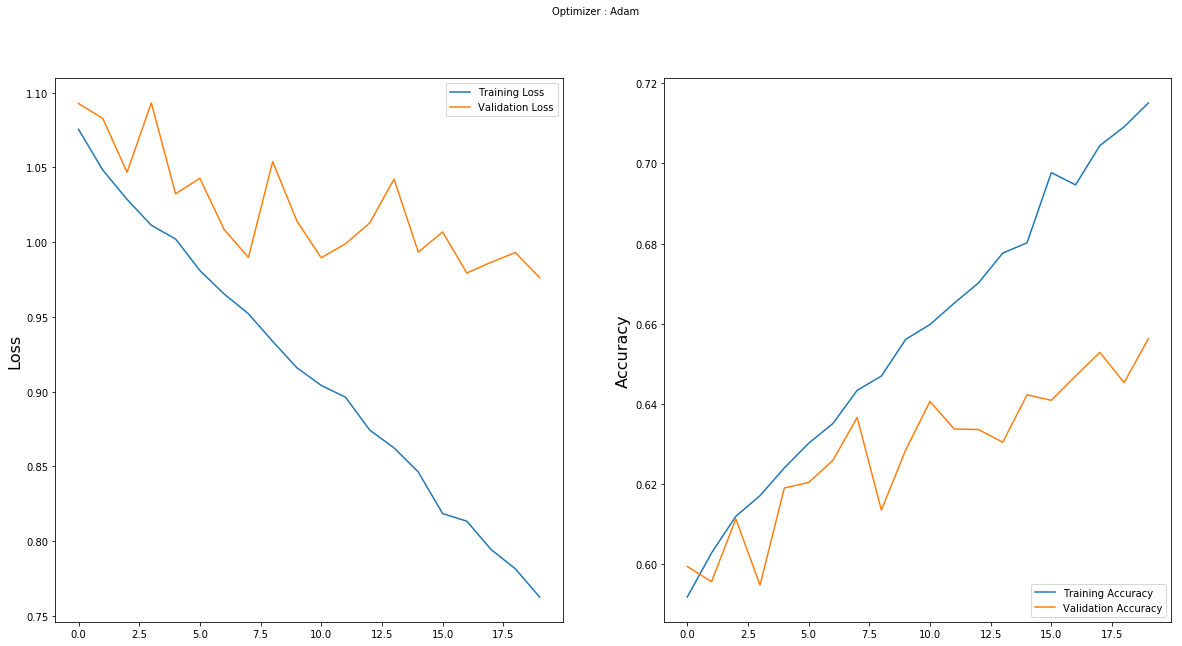

In [210]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


## Confusion Matrix

In [218]:
steps = validation_generator.n//validation_generator.batch_size +1
predictions = model.predict_generator(generator=validation_generator, steps=steps)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

cnf_matrix = confusion_matrix(y_test, y_pred)

cnf_matrix

array([[ 34,   0,   0,   0,  62,  68, 578, 204,  14],
       [  7,   0,   0,   1,  17,  13,  32,  89,   3],
       [  5,   0,   0,   0,   8,   3,  32,  63,   0],
       [ 15,   0,   0,   0,  19,   7,  35,  94,   4],
       [ 37,   1,   1,   0, 116,  51, 140, 339, 333],
       [455, 159,  68, 165, 165,  92, 216, 189, 316],
       [ 70,   0,   3,   1, 468, 229, 135, 207, 103],
       [ 15,   3,   0,   0,  19, 964,  66,  47,  25],
       [ 22,   0,   0,   1,  33, 376, 263,  85,  17]])

In [217]:
print(validation_generator.class_indices)

{'neutral': 6, 'angry': 0, 'happy': 5, 'distracted': 3, 'confused': 1, 'disgust': 2, 'fear': 4, 'sad': 7, 'surprise': 8}


In [ ]:
## July 6 --> Tracey kick off the run till here.... continue below once training is done....


In [198]:
test=cnf_matrix
test1 = test / test.sum(axis=1)
test1

array([[0.05, 0.  , 0.02, 0.  , 0.03, 0.04, 0.15, 0.29, 0.37],
       [0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.14],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.09],
       [0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.1 ],
       [0.39, 0.46, 0.23, 0.01, 0.02, 0.05, 0.16, 0.18, 0.03],
       [0.15, 0.57, 0.54, 0.92, 0.15, 0.27, 0.21, 0.32, 0.18],
       [0.03, 0.  , 0.02, 0.  , 0.01, 0.55, 0.06, 0.08, 0.03],
       [0.06, 0.  , 0.04, 0.01, 0.01, 0.12, 0.53, 0.17, 0.02],
       [0.04, 0.  , 0.07, 0.  , 0.01, 0.04, 0.22, 0.34, 0.01]])

In [173]:
1316/(41+3+1+7+1316+248+173+36)

0.7210958904109589

In [171]:
print(validation_generator.class_indices)

{'neutral': 6, 'angry': 0, 'happy': 5, 'distracted': 3, 'confused': 1, 'disgust': 2, 'fear': 4, 'sad': 7, 'surprise': 8}


In [178]:
from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.07      0.05      0.06       960
    confused       0.00      0.00      0.00       162
     disgust       0.00      0.00      0.00       111
  distracted       0.00      0.00      0.00       130
        fear       0.17      0.04      0.07      1018
       happy       0.07      0.08      0.08      1825
     neutral       0.10      0.13      0.11      1216
         sad       0.05      0.07      0.06      1139
    surprise       0.01      0.01      0.01       797

    accuracy                           0.07      7358
   macro avg       0.05      0.04      0.04      7358
weighted avg       0.08      0.07      0.07      7358



<Figure size 432x288 with 0 Axes>

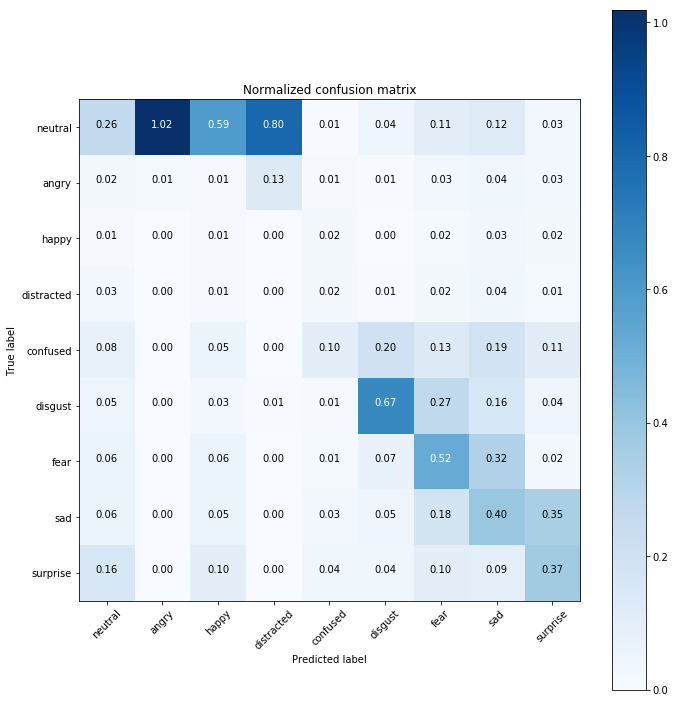

In [185]:
# show the confusion matrix of our predictions

# compute predictions
# predictions = model.predict_generator(generator=validation_generator, steps=57.484375)
# y_pred = [np.argmax(probas) for probas in predictions]
# y_test = validation_generator.classes
# class_names = validation_generator.class_indices.keys()

# from sklearn.metrics import confusion_matrix
# import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)#[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
y_pred
y_test

#9classes
#each of them accuracy = tp/(tp+fp)

# Model 1 v2 remove disgust fear

In [121]:
%mkdir data7cls

In [122]:
!pwd

/notebooks


In [123]:
%cp -r /notebooks/data  /notebooks/data7cls

In [ ]:
# option 1, run model with 7 classes - Tracey 

In [124]:
# input path for the images
base_path = "/notebooks/data7cls/"

In [125]:
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Found 25453 images belonging to 8 classes.
Found 6229 images belonging to 8 classes.


In [ ]:
# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights_7class.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

In [ ]:
# option 2: setup transfer learning code, using 9 classes wts for 7 classes - Michelle

## Model 2 : littleVGG